In [58]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import numpy as np

In [59]:
#this would be a very lengthy calculation but could iterate over product of B gate family (in both gc and gg) with itself, find best combination of #k gates
from slam.hamiltonian import ConversionGainHamiltonian
from slam.utils.gates.custom_gates import CustomCostGate
from slam.basis import MixedOrderBasisCircuitTemplate
from slam.utils.monodromy.polytope_wrap import coverage_to_haar_expectation

In [62]:
#this shows combinining 2 conversion-gain gates to minimize expected haar cost
#what is probably more useful is to instead minimize cost on a circuit, so we can get better coverage ie a hard to build swap gate

h = ConversionGainHamiltonian()
SPEED_LIMIT = np.pi/2

i,j = 0,4 #sqiswap
cost = sum([i*np.pi/16, j*np.pi/16])/SPEED_LIMIT
u = h._construct_U_lambda(i*np.pi/16, j*np.pi/16)(1).full()
gate1 = CustomCostGate(u, f"B({i*np.pi/16, j*np.pi/16})", cost=cost)

i,j = 3,1 #B
cost = sum([i*np.pi/16, j*np.pi/16])/SPEED_LIMIT
u = h._construct_U_lambda(i*np.pi/16, j*np.pi/16)(1).full()
gate2 = CustomCostGate(u, f"B({i*np.pi/16, j*np.pi/16})", cost=cost)

# from qiskit.circuit.library.standard_gates import SwapGate
# gate3 = CustomCostGate(SwapGate(), "Swap", cost=1)

basis_gates = [gate2]# ,gate3]
basis = MixedOrderBasisCircuitTemplate(base_gates=basis_gates)
coverage_to_haar_expectation(basis.coverage)

INFO:root:==== Working to build a set of covering polytopes ====


Considering B((0.39269908169872414, 0.14726215563702155));	Cost 0.34374999999999994 and Euclidean volume   0.00%
Considering B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155));	Cost 0.6874999999999999 and Euclidean volume  15.14%
Considering B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155));	Cost 1.0312499999999998 and Euclidean volume  50.00%
Considering B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155));	Cost 1.3749999999999998 and Euclidean volume  83.33%
Considering B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155))·B((0.39269908169872414, 0.14726215563702155));	Cost 1.7187499999999998 and Eucl

INFO:root:==== Done. Here's what we found: ====
INFO:root:Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.34	 | B((0.39269908169872414, 0.14726215563702155))
 15.14% =  155/1024 	 | 0.69	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
 50.00% =    1/2    	 | 1.03	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
 83.33% =    5/6    	 | 1.37	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
 97.92% =   47/48   	 | 1.72	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
100.00% =  

 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.14726215563702155))
0.03337	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
0.46663	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
0.45988	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
0.03998	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155))
0.00014	 | B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 0.14726215563702155)).B((0.39269908169872414, 

INFO:root:Haar-expectation cost: 1.2054917276766806


1.2054917276766806

In [4]:
from slam.cost_function import BasicCost
from slam.optimizer import TemplateOptimizer
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)

In [5]:
#compare cost for a single SWAP gate
from qiskit.circuit.library.standard_gates import SwapGate
from slam.sampler import GateSample
swap_sample = GateSample(gate=SwapGate())
optimizer.cost_from_distribution(sampler=swap_sample)

INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5


1.5

In [6]:
#compare cost on an actual circuit
from slam.sampler import CircuitSample
from qiskit.circuit.library.basis_change import QFT
from qiskit import transpile
from qiskit.test.mock import FakeVigoV2

#transpile QFT on a topology to induce SWAPs
qc = QFT(4)
logger.setLevel(logging.CRITICAL) #turn off to avoid unnecessary messages
qc = transpile(qc, coupling_map=FakeVigoV2().coupling_map)
logger.setLevel(logging.INFO) #turn back on
qft_sampler = CircuitSample(qc)

#optimizer.approximate_from_distribution(sampler=sampler) #pretrains
ret = optimizer.cost_from_distribution(sampler=qft_sampler)

INFO:qiskit.transpiler.runningpassmanager:Pass: Collect2qBlocks - 0.20146 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ConsolidateBlocks - 13.36122 (ms)
INFO:root:Created sampler with 13 2Q gates
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077


In [7]:
#and don't forget we can decompose into actual gate values
#TODO, integrate into a transpiler pass, just have to assign the Xk values at the end and wrap in a transformation pass

In [8]:
[el for el in range(2,18,2)]

[2, 4, 6, 8, 10, 12, 14, 16]

In [44]:
#so here is the big question
#given a circuit, how to you do this process backwards and determine which gates to select to minimize average gate pulse cost
#besides brute forcing...
#maybe we just start with if we have 1 gate, iterate over the rest to find its best compliment

data1 = [] #QFT cost
data2 = [] #Swap cost
data3 = [] #E[haar] cost

i,j = 0,4 #sqiswap, holding this one constant, TODO do again with cube root
cost = sum([i*np.pi/16, j*np.pi/16])/SPEED_LIMIT
u = h._construct_U_lambda(i*np.pi/16, j*np.pi/16)(1).full()
gate1 = CustomCostGate(u, f"B({i*np.pi/16, j*np.pi/16})", cost=cost)

for i in range(0,5): #range(2,18,2)
    temp_data1 = []
    temp_data2 = []
    temp_data3 = []
    for j in range(0,5):
        if i < j:
            temp_data1.append(-1)
            temp_data2.append(-1)
            temp_data3.append(-1)
            continue
        
        print(f"iter {i},{j}")
        cost = sum([i*np.pi/16, j*np.pi/16])/SPEED_LIMIT
        u = h._construct_U_lambda(i*np.pi/16, j*np.pi/16)(1).full()
        gate2 = CustomCostGate(u, f"B({i*np.pi/16, j*np.pi/16})", cost=cost)

        basis_gates = [gate1, gate2]# ,gate3]
        basis = MixedOrderBasisCircuitTemplate(base_gates=basis_gates, chatty_build=False)

        #finding best over this QFT circuit above
        ret = optimizer.cost_from_distribution(sampler=qft_sampler) 
        temp_data1.append(ret)

        #swap data
        ret = optimizer.cost_from_distribution(sampler=swap_sample)
        temp_data2.append(ret)

        #e[haar] data
        ret = coverage_to_haar_expectation(basis.coverage)
        temp_data3.append(ret)

    data1.append(temp_data1)
    data2.append(temp_data2)
    data3.append(temp_data3)

iter 0,0


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.0))
0.00000	 | B((0.0, 0.0)).B((0.0, 0.7853981633974483))
0.79012	 | B((0.0, 0.0)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.20988	 | B((0.0, 0.0)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.1049413181578387


iter 1,0


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.19634954084936207, 0.0))
0.00002	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.00088	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.00875	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.04420	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.13925	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.30186	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.46492	 | B((0.19634954084936207, 0.0)).B((0.1

INFO:root:Haar-expectation cost: 0.9114923971390635


iter 1,1


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.19634954084936207, 0.19634954084936207))
0.00000	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.00000	 | B((0.0, 0.7853981633974483))
0.00419	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.01365	 | B((0.19634954084936207, 0.19634954084936207)).B((0.0, 0.7853981633974483))
0.77405	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.03219	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.0, 0.7853981633974483))
0.00024	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.14724	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.19634954084936207, 0.19634954084936207))
0.00356	 | B((0.19

INFO:root:Haar-expectation cost: 1.0456777144887897


iter 2,0


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.0))
0.00757	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.18553	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.76678	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.03998	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.00014	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))


INFO:root:Haar-expectation cost: 0.9598936659817359


iter 2,1


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.19634954084936207))
0.00000	 | B((0.0, 0.7853981633974483))
0.03746	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.20443	 | B((0.39269908169872414, 0.19634954084936207)).B((0.0, 0.7853981633974483))
0.58000	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.00717	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.13083	 | B((0.39269908169872414, 0.19634954084936207)).B((0.0, 0.7853981633974483)).B((0.39269908169872414, 0.19634954084936207))
0.03900	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.39269908169872414, 0.19634954084936207))
0.00112	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.013870960821309


iter 2,2


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.39269908169872414, 0.39269908169872414))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.01365	 | B((0.39269908169872414, 0.39269908169872414)).B((0.0, 0.7853981633974483))
0.19623	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0981146503585557


iter 3,0


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5890486225480862, 0.0))
0.00000	 | B((0.0, 0.7853981633974483))
0.15417	 | B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0))
0.23746	 | B((0.5890486225480862, 0.0)).B((0.0, 0.7853981633974483))
0.39848	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.20569	 | B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0))
0.00405	 | B((0.5890486225480862, 0.0)).B((0.0, 0.7853981633974483)).B((0.5890486225480862, 0.0))
0.00014	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.5890486225480862, 0.0))
0.00000	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 0.9585517793117264


iter 3,1


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.5890486225480862, 0.19634954084936207))
0.73244	 | B((0.5890486225480862, 0.19634954084936207)).B((0.0, 0.7853981633974483))
0.14575	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.00082	 | B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207))
0.12099	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0604970191691034


iter 3,2


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.5890486225480862, 0.39269908169872414))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.07070	 | B((0.5890486225480862, 0.39269908169872414)).B((0.0, 0.7853981633974483))
0.00221	 | B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414))
0.13697	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0778740012900667


iter 3,3


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.5890486225480862, 0.5890486225480862))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.01776	 | B((0.5890486225480862, 0.5890486225480862)).B((0.0, 0.7853981633974483))
0.19212	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.1005002716350116


iter 4,0


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.20988	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.1049413181578387


iter 4,1


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.7853981633974483, 0.19634954084936207))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.15580	 | B((0.7853981633974483, 0.19634954084936207)).B((0.0, 0.7853981633974483))
0.01391	 | B((0.7853981633974483, 0.19634954084936207)).B((0.7853981633974483, 0.19634954084936207))
0.04017	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0430386307655595


iter 4,2


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.7853981633974483, 0.39269908169872414))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.14950	 | B((0.7853981633974483, 0.39269908169872414)).B((0.0, 0.7853981633974483))
0.06038	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0675651676752018


iter 4,3


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.00000	 | B((0.7853981633974483, 0.5890486225480862))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.07846	 | B((0.7853981633974483, 0.5890486225480862)).B((0.0, 0.7853981633974483))
0.13142	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.0951335519935137


iter 4,4


INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:Total circuit pulse cost: 17.0
INFO:root:Average gate pulse cost: 1.3076923076923077
INFO:root:Total circuit pulse cost: 1.5
INFO:root:Average gate pulse cost: 1.5
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.7853981633974483))
0.79012	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))
0.20988	 | B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483)).B((0.0, 0.7853981633974483))


INFO:root:Haar-expectation cost: 1.1049413181578387


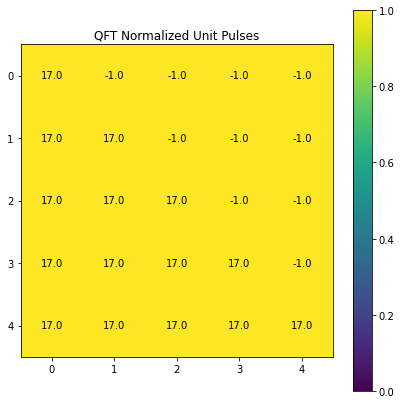

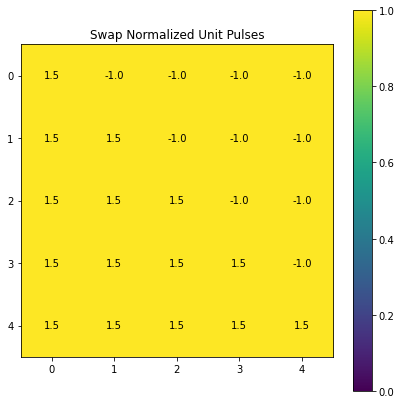

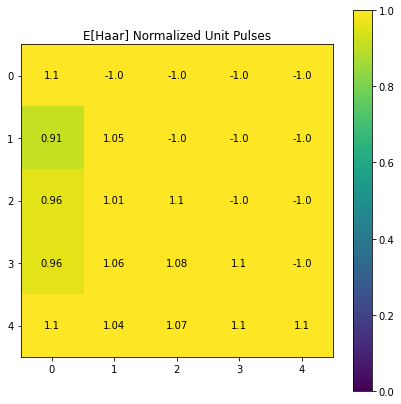

In [57]:
from slam.utils.visualize import plotHamiltonianSweep
plotHamiltonianSweep(np.matrix(data1), title="QFT Normalized Unit Pulses");
plotHamiltonianSweep(np.matrix(data2), title="Swap Normalized Unit Pulses");
plotHamiltonianSweep(np.matrix(data3), title="E[Haar] Normalized Unit Pulses");

In [ ]:
# from slam.utils.monodromy.polytope_wrap import coverage_to_haar_expectation
# from slam.basis import MixedOrderBasisCircuitTemplate
# from slam.utils.gates.custom_gates import RiSwapGate, CustomCostGate
# gate1 = CustomCostGate.from_gate(RiSwapGate(1/2), cost=1/2)
# gate2 = CustomCostGate.from_gate(RiSwapGate(1/3), cost=1/3)
# basis_gates = [gate1,gate2]
# basis = MixedOrderBasisCircuitTemplate(base_gates=basis_gates)
# coverage_to_haar_expectation(basis.coverage)